In [466]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [467]:
# Import the dataset
train=pd.read_csv('House price regression Kaggle competition/train.csv')
test=pd.read_csv('House price regression Kaggle competition/test.csv')

In [468]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [469]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [470]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [471]:
print(train.shape)
print(test.shape)

(1460, 81)
(1459, 80)


In [472]:
train.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [473]:
corr=train.corr()
print(corr)

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

In [474]:
train['LotFrontage'].isnull().sum()

259

In [475]:
for i in train.columns:
    a=train[i].isnull().sum()
    print("Column name: ",i,', Missing values: ',a)

Column name:  Id , Missing values:  0
Column name:  MSSubClass , Missing values:  0
Column name:  MSZoning , Missing values:  0
Column name:  LotFrontage , Missing values:  259
Column name:  LotArea , Missing values:  0
Column name:  Street , Missing values:  0
Column name:  Alley , Missing values:  1369
Column name:  LotShape , Missing values:  0
Column name:  LandContour , Missing values:  0
Column name:  Utilities , Missing values:  0
Column name:  LotConfig , Missing values:  0
Column name:  LandSlope , Missing values:  0
Column name:  Neighborhood , Missing values:  0
Column name:  Condition1 , Missing values:  0
Column name:  Condition2 , Missing values:  0
Column name:  BldgType , Missing values:  0
Column name:  HouseStyle , Missing values:  0
Column name:  OverallQual , Missing values:  0
Column name:  OverallCond , Missing values:  0
Column name:  YearBuilt , Missing values:  0
Column name:  YearRemodAdd , Missing values:  0
Column name:  RoofStyle , Missing values:  0
Column

In [476]:
# Exploratory Data Analysis

In [477]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


C:\Users\Mayur Pawar\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SalePrice'>

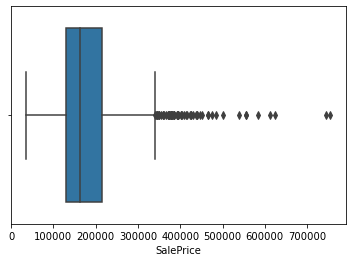

In [478]:
sns.boxplot(train['SalePrice'])

C:\Users\Mayur Pawar\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

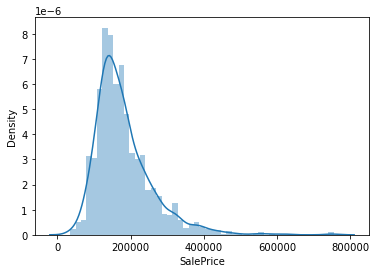

In [479]:
sns.distplot(train['SalePrice'])

In [480]:
# Feature Engineering
# missing data imputation
# categroical Encodiing
# variable transformation
# descretization
# outlier Engineering


In [481]:
for i in train.columns:
    a=train[i].isnull().sum()
    print("Column name: ",i,', Missing values: ',a)

Column name:  Id , Missing values:  0
Column name:  MSSubClass , Missing values:  0
Column name:  MSZoning , Missing values:  0
Column name:  LotFrontage , Missing values:  259
Column name:  LotArea , Missing values:  0
Column name:  Street , Missing values:  0
Column name:  Alley , Missing values:  1369
Column name:  LotShape , Missing values:  0
Column name:  LandContour , Missing values:  0
Column name:  Utilities , Missing values:  0
Column name:  LotConfig , Missing values:  0
Column name:  LandSlope , Missing values:  0
Column name:  Neighborhood , Missing values:  0
Column name:  Condition1 , Missing values:  0
Column name:  Condition2 , Missing values:  0
Column name:  BldgType , Missing values:  0
Column name:  HouseStyle , Missing values:  0
Column name:  OverallQual , Missing values:  0
Column name:  OverallCond , Missing values:  0
Column name:  YearBuilt , Missing values:  0
Column name:  YearRemodAdd , Missing values:  0
Column name:  RoofStyle , Missing values:  0
Column

In [482]:
# Dealing with missing values
train.drop(['Alley'],axis=1,inplace=True)
test.drop(['Alley'],axis=1,inplace=True)

In [483]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [484]:
b=train['LotFrontage'].mean()
train['LotFrontage'].fillna(b,inplace=True)
test['LotFrontage'].fillna(b,inplace=True)

In [485]:
train.drop(['Id'],axis=1,inplace=True)

In [486]:
# Train test split

In [487]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [488]:
X=train[['LotFrontage','LotArea','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','WoodDeckSF','OpenPorchSF']]
Y=train['SalePrice']

In [489]:
#from sklearn.model_selection import train_test_split
#X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [490]:
#print(X_train.shape)
#print(X_test.shape)
#print(Y_train.shape)
#print(Y_test.shape)

In [491]:
# Feature Engineering

In [492]:
# missing data imputation
# categroical Encodiing
# variable transformation
# descretization
# outlier Engineering

In [493]:
# Categorical Encoding

In [494]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
X=X.apply(le.fit_transform)

In [495]:
X

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,WoodDeckSF,OpenPorchSF
0,36,327,6,104,53,128,361,0,49
1,52,498,5,77,26,0,482,187,0
2,39,702,6,102,52,104,222,0,30
3,31,489,6,19,20,0,66,0,24
4,56,925,7,101,50,221,328,118,70
...,...,...,...,...,...,...,...,...,...
1455,33,267,5,100,50,0,0,0,28
1456,57,866,5,79,38,72,407,214,0
1457,37,415,6,44,56,0,95,0,48
1458,39,505,4,51,46,0,14,224,0


In [496]:
# Feature Scaling

In [497]:
X.describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,WoodDeckSF,OpenPorchSF
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,41.251370,492.102740,5.099315,72.975342,34.865753,59.663699,203.337671,53.979452,35.636986
std,19.051187,300.719399,1.382997,28.852359,20.645407,91.506274,202.082463,72.089748,47.892383
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,229.750000,4.000000,55.000000,17.000000,0.000000,0.000000,0.000000,0.000000
50%,42.000000,476.500000,5.000000,74.000000,44.000000,0.000000,159.500000,0.000000,15.000000
75%,51.000000,737.250000,6.000000,101.000000,54.000000,110.000000,363.250000,97.000000,56.000000
max,110.000000,1072.000000,9.000000,111.000000,60.000000,327.000000,636.000000,273.000000,201.000000


In [498]:
from sklearn.preprocessing import MinMaxScaler
col=X.columns
X=MinMaxScaler().fit_transform(X)

In [499]:
X=pd.DataFrame(X,columns=col)

In [500]:
X

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,WoodDeckSF,OpenPorchSF
0,0.327273,0.305037,0.666667,0.936937,0.883333,0.391437,0.567610,0.000000,0.243781
1,0.472727,0.464552,0.555556,0.693694,0.433333,0.000000,0.757862,0.684982,0.000000
2,0.354545,0.654851,0.666667,0.918919,0.866667,0.318043,0.349057,0.000000,0.149254
3,0.281818,0.456157,0.666667,0.171171,0.333333,0.000000,0.103774,0.000000,0.119403
4,0.509091,0.862873,0.777778,0.909910,0.833333,0.675841,0.515723,0.432234,0.348259
...,...,...,...,...,...,...,...,...,...
1455,0.300000,0.249067,0.555556,0.900901,0.833333,0.000000,0.000000,0.000000,0.139303
1456,0.518182,0.807836,0.555556,0.711712,0.633333,0.220183,0.639937,0.783883,0.000000
1457,0.336364,0.387127,0.666667,0.396396,0.933333,0.000000,0.149371,0.000000,0.238806
1458,0.354545,0.471082,0.444444,0.459459,0.766667,0.000000,0.022013,0.820513,0.000000


In [501]:
# Model Building

In [502]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [503]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1168, 9)
(292, 9)
(1168,)
(292,)


In [504]:
# Linear Regression

In [505]:
from sklearn.linear_model import LinearRegression

logreg=LinearRegression()

logreg.fit(X_train,Y_train)

LinearRegression()

In [506]:
Y_test_pred=logreg.predict(X_test)

In [507]:
from sklearn.metrics import r2_score
print("Model accuracy score on test set is : ",r2_score(Y_test,Y_test_pred))

Model accuracy score on test set is :  0.758278973622119


In [508]:
Y_train_pred=logreg.predict(X_train)

In [509]:
print("Model accuracy score on test set is : ",r2_score(Y_train,Y_train_pred))

Model accuracy score on test set is :  0.7441763416632698


In [510]:
# Now lets make prediction for overall test set 

In [511]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [512]:
test1=test[['Id','LotFrontage','LotArea','OverallQual','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','WoodDeckSF','OpenPorchSF']]

In [513]:
c=test1['Id']
c

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [514]:
test1

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,WoodDeckSF,OpenPorchSF
0,1461,80.0,11622,5,1961,1961,0.0,468.0,140,0
1,1462,81.0,14267,6,1958,1958,108.0,923.0,393,36
2,1463,74.0,13830,5,1997,1998,0.0,791.0,212,34
3,1464,78.0,9978,6,1998,1998,20.0,602.0,360,36
4,1465,43.0,5005,8,1992,1992,0.0,263.0,0,82
...,...,...,...,...,...,...,...,...,...,...
1454,2915,21.0,1936,4,1970,1970,0.0,0.0,0,0
1455,2916,21.0,1894,4,1970,1970,0.0,252.0,0,24
1456,2917,160.0,20000,5,1960,1996,0.0,1224.0,474,0
1457,2918,62.0,10441,5,1992,1992,0.0,337.0,80,32


In [515]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
test1=test1.apply(le.fit_transform)

In [516]:
test1

,Id,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,WoodDeckSF,OpenPorchSF
0,0,57,777,4,56,11,0,227,75,0
1,1,58,964,5,53,8,58,478,225,24
2,2,51,947,4,92,48,0,417,134,22
3,3,55,587,5,93,48,6,310,219,24
4,4,19,118,7,87,42,0,107,0,68
...,...,...,...,...,...,...,...,...,...,...
1454,1454,0,19,3,65,20,0,0,0,0
1455,1455,0,17,3,65,20,0,98,0,12
1456,1456,113,1069,4,55,46,0,588,245,0
1457,1457,38,647,4,87,42,0,150,37,20


In [517]:
from sklearn.preprocessing import MinMaxScaler
col1=test1.columns
test1=MinMaxScaler().fit_transform(test1)

In [518]:
test1=pd.DataFrame(test1,columns=col1)

In [519]:
test1.drop(['Id'],axis=1,inplace=True)

In [520]:
test1

,LotFrontage,LotArea,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,WoodDeckSF,OpenPorchSF
0,0.495652,0.703167,0.444444,0.533333,0.183333,0.000000,0.339312,0.286260,0.000000
1,0.504348,0.872398,0.555556,0.504762,0.133333,0.191419,0.714499,0.858779,0.118812
2,0.443478,0.857014,0.444444,0.876190,0.800000,0.000000,0.623318,0.511450,0.108911
3,0.478261,0.531222,0.555556,0.885714,0.800000,0.019802,0.463378,0.835878,0.118812
4,0.165217,0.106787,0.777778,0.828571,0.700000,0.000000,0.159940,0.000000,0.336634
...,...,...,...,...,...,...,...,...,...
1454,0.000000,0.017195,0.333333,0.619048,0.333333,0.000000,0.000000,0.000000,0.000000
1455,0.000000,0.015385,0.333333,0.619048,0.333333,0.000000,0.146487,0.000000,0.059406
1456,0.982609,0.967421,0.444444,0.523810,0.766667,0.000000,0.878924,0.935115,0.000000
1457,0.330435,0.585520,0.444444,0.828571,0.700000,0.000000,0.224215,0.141221,0.099010


In [521]:
y_pred_on_test=logreg.predict(test1)


In [522]:
y_pred_on_test

array([146043.95384332, 218624.88575285, 189775.55295586, ...,
       219010.95070465, 146019.34962158, 231280.40732657])

In [523]:
new_dataframe=pd.DataFrame()

In [524]:
new_dataframe

""


In [525]:
new_dataframe['Id']=c

In [526]:
new_dataframe

,Id
0,1461
1,1462
2,1463
3,1464
4,1465
...,...
1454,2915
1455,2916
1456,2917
1457,2918


In [527]:
new_dataframe['SalePrice']=y_pred_on_test

In [528]:
new_dataframe

,Id,SalePrice
0,1461,146043.953843
1,1462,218624.885753
2,1463,189775.552956
3,1464,205067.653893
4,1465,209407.482864
...,...,...
1454,2915,52741.995597
1455,2916,59356.064730
1456,2917,219010.950705
1457,2918,146019.349622


In [529]:
new_dataframe.to_csv("House_price_kaggle.csv",index=False)